# Analysis of Effective Altruism Facebook Group Posts
## 2012 - 2015

Data taken from https://docs.google.com/spreadsheets/d/1zRc2AvZ_nWEyXdOPz9XzjuXszMa92C9WUSVOul-NJyo/edit#gid=1562892504



### Growth

NB: "Posts" in the spreadsheet includes both "status" posts and "link" posts made to the group, henceforth "status-posts" and "link-posts." There were also an insignificant number of "other" types including photo, video, and music.

* The total number of status-posts has remained constant for the last three years (Figure 1). 
* The number of link-containing posts has increased year-on-year by ~25% (Figure 1).
* Because of increase in link-posts, the total number of posts (of all types) is increasing annually.
* The group was started in late 2012 but had 23 posts for the year, compared with 1300+ for subsequent years (Table 1).


### Comments
* The absolute number of comments has been decreasing annually, despite increased number of overall posts (Figure 2). 
    - The number of comments per status-post has dropped from an average of 11.3 in 2013, to 7.8 in 2015 (Table 2)
 
 
### Other Comparison of Status- and Link-Posts
* Status-posts receive an average of 9.7 comments per post compared to 5.4 comments per post for link-posts (Table 3).
* Link-posts receive slightly more likes on average than status-posts, 9.3 vs. 7.2 (Table 3).
* Link-posts receive more than 30 times the number of shares as status-posts on average. This explains the large increase in number of shares in 2015.


### Monthly Variation
* Compared with the preceding 12-months, there was a dip in activity from mid-2014 to early 2015 (Figure 3). I don't why. Things started going back up sometime between February and June. I didn't get a chance to look into the changes on that finer time-scale. Does anybody know what's changed with the group from last year to this year? 


### Contributors
* The number of unique contributors has increased linearly since 2013 (Figure 4).
* Half or more of the top contributors list has stayed the same since 2013 (Tables 4-7).
* See below for Leaderboards for Top Contributors for 2013,2014,2015 and All Time.




## Conclusion
Overall group activity has been increasing since 2012, however the composition and nature of the activity has changed. While the number of status-posts has stayed constant since 2013, their proportion of total posts has dropped. In 2013, the number of statuses posted and links posted were roughly equal, whereas in 2015, 50% more links were posted than statuses. Additionally, the number of comments per status-post has been dropping since 2013.

There has been an annual increase in 

Questions I didn't attempt to answer.
Are the additional posters providing value? Do their posts get as many likes/shares/comments, or are they opportunistically posting on a large group?

In [48]:
# Imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [49]:
posts = pd.read_csv('Effective Altruism facebook group posts data - posts (1).csv')
posts['createdTime'] = pd.to_datetime(posts['createdTime'])
posts['year'] = posts['createdTime'].apply(lambda x: x.year)
posts['week'] = posts['createdTime'].apply(lambda x: x.week)
posts['month'] = posts['createdTime'].apply(lambda x: x.month)
posts['quarter'] = posts['createdTime'].apply(lambda x: x.quarter)

### Figure 1: Number of Posts by Type vs. Year

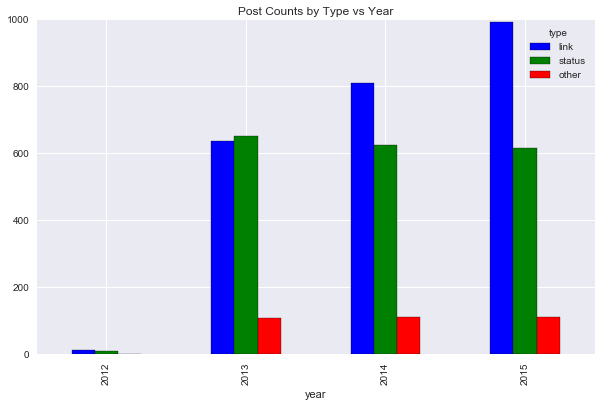

In [71]:
postsTypes = posts.groupby(['year','type']).count()['id'].unstack()
postsTypes.fillna(0,inplace=True)

otherCols = set(list(postsTypes.columns))
mainCols = set(['link','status'])
otherCols = otherCols-mainCols
otherCols = list(otherCols)

postsTypes['other'] = postsTypes[otherCols].sum(axis=1)
postsTypes.drop(otherCols,axis=1,inplace=True)

fig = postsTypes.plot(kind='bar',figsize=(10,6))
fig.set_title("Post Counts by Type vs Year")

### Table 1: Number of Posts by Year
* The group was started in late 2012 but had 23 posts for the year, compared with 1300+ for subsequent years (Table 1).

In [51]:
postsY = posts.groupby(['year']).agg({'likesCount' : np.sum,'commentsCount' : np.sum,'sharesCount' : np.sum,'id': 'count'})
postsY.rename(columns={'id':'postsCount'},inplace=True)
postsY.sort_index()

,postsCount,likesCount,sharesCount,commentsCount
year,,,,
2012,23,96,5,85
2013,1398,7658,447,12087
2014,1543,12617,508,10929
2015,1719,18385,1038,9767


### Figure 2: Activity Counts vs Year
* Because of increase in link-posts, the total number of posts (of all types) is increasing annually.
* The absolute number of comments has been decreasing annually, despite increased number of overall posts (Figure 2). 



c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


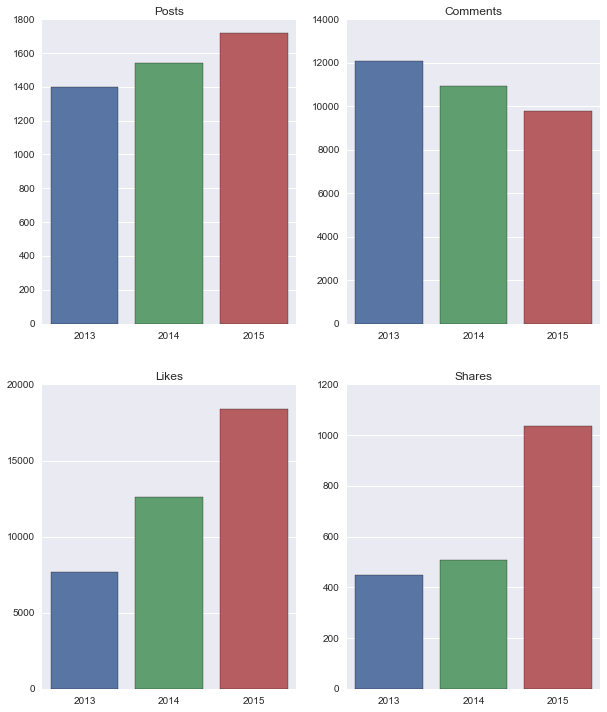

In [52]:
postsY.reset_index(inplace=True)
postsY = postsY[postsY['year']>2012]
fig, Ax = plt.subplots(2,2,figsize=(10,12))

sns.barplot(y='postsCount',x='year',data=postsY,ax=Ax[0,0])
sns.barplot(y='commentsCount',x='year',data=postsY,ax=Ax[0,1])
sns.barplot(y='likesCount',x='year',data=postsY,ax=Ax[1,0])
sns.barplot(y='sharesCount',x='year',data=postsY,ax=Ax[1,1])

Ax[0,0].set_title('Posts'); Ax[0,0].set_xlabel(''); Ax[0,0].set_ylabel('')
Ax[0,1].set_title('Comments');Ax[0,1].set_xlabel('');Ax[0,1].set_ylabel('')
Ax[1,0].set_title('Likes');Ax[1,0].set_xlabel('');Ax[1,0].set_ylabel('')
Ax[1,1].set_title('Shares');Ax[1,1].set_xlabel('');Ax[1,1].set_ylabel('')
#Dammit, what's the command to turn off axis labels?

### Table 2: Average Likes/Comments/Shares for Status Posts
    - The number of comments per status-post has dropped from an average of 11.3 in 2013, to 7.8 in 2015 (Table 2)
    - Link-posts receive more than 30 times the number of shares as status-posts on average. This is what's driving the large increase in number of shares in 2015.

In [53]:
postsTypes = posts[(posts['type']=='status')].groupby(['year','type']).mean()
postsTypes[['likesCount','commentsCount','sharesCount']].round(2)

,,likesCount,commentsCount,sharesCount
year,type,,,
2012,status,3.67,1.22,0.00
2013,status,5.14,11.27,0.01
2014,status,7.34,10.10,0.02
2015,status,9.32,7.79,0.04


### Table 3: Likes/Comments/Shares for Status vs Links
* Status-posts receive an average of 9.7 comments per post compared to 5.4 comments per post for link-posts (Table 3).
* Link-posts receive slightly more likes on average than status-posts, 9.3 vs. 7.2 (Table 3).
* Link-posts receive more than 30 times the number of shares as status-posts on average. This explains the large increase in number of shares in 2015.

In [54]:
postsTypes = posts[(posts['type']=='link')|(posts['type']=='status')].groupby(['type']).mean()
postsTypes[['likesCount','commentsCount','sharesCount']].round(2)


,likesCount,commentsCount,sharesCount
type,,,
link,9.29,5.37,0.72
status,7.21,9.71,0.02


### Figure 3: Monthly Variation
* Compared with the preceding 12-months, there was a dip in activity from mid-2014 to early 2015 (Figure 3). I don't why, and it's not seasonality. Things started going back up sometime between February and June. I didn't get a chance to look into the changes on that finer time-scale. Does anybody know what's changed with the group from last year to this year? 

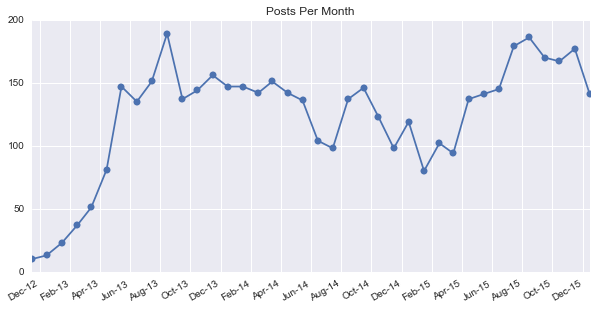

In [55]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
postsW = posts.groupby(['year','month']).agg({'likesCount' : np.sum,'commentsCount' : np.sum,'sharesCount' : np.sum,'id': 'count'})
postsW.rename(columns={'id':'postsCount'},inplace=True)
postsW['date_month'] = [datetime.datetime(a[0],a[1],15,0,0) for a in list(postsW.index)]

months = MonthLocator(interval=2)
monthsFmt = DateFormatter("%b-%y")
fig, (ax1) = plt.subplots(1,1,figsize=(10,5),sharex=False)
ax1.plot_date(postsW['date_month'],postsW['postsCount'],'-o')
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(monthsFmt)

fig.autofmt_xdate()
ax1.autoscale_view()
ax1.set_title('Posts Per Month')

#Yeah, not the best graph.

### Figure 4: Unique Contributors
* The number of unique contributors has increased linearly since 2013 (Figure 4).

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


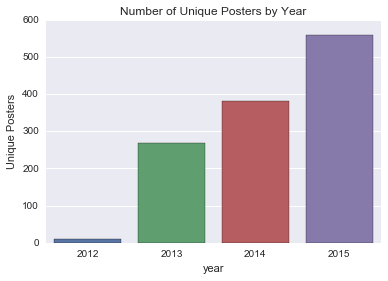

In [56]:
postersYear = posts.groupby(['year','authorName']).count()['id'].reset_index(level=1)
postersYear = postersYear.reset_index().groupby('year').count()
postersYear.reset_index(inplace=True)
ax = sns.barplot(x='year',y='id',data=postersYear)
#postersYear.reset_index().plot(x='year',y='id')
ax.set_ylabel('Unique Posters')
ax.set_title('Number of Unique Posters by Year')

In [57]:
def TopContsFunc(posts,year=None):
    
    if(year):
        posts = posts[posts['year']==year]

    TopConts = posts.groupby('authorName').agg({'id': 'count',
                                            'likesCount' : np.sum,
                                              'commentsCount' : np.sum,
                                              'sharesCount' : np.sum
                                              }).sort_values(by='id',ascending=False)

    TopConts = TopConts[['id','likesCount','commentsCount','sharesCount']]
    TopConts.rename(columns={'id':'postsCount'},inplace=True)
    TopConts['LikesPerPost'] = np.round(TopConts['likesCount']/TopConts['postsCount'],2)
    TopConts['CommentsPerPost'] = np.round(TopConts['commentsCount']/TopConts['postsCount'],2)
    TopConts['SharesPerPost'] = np.round(TopConts['sharesCount']/TopConts['postsCount'],2)
    TopConts.reset_index(inplace=True)
    return TopConts


## CONTRIBUTORS TABLES
* 1: All Time
* 2: 2015
* 3: 2014
* 4: 2013

### Table 4: TOP 20 CONTRIBUTORS (posts) ALL TIME

In [58]:
TopContsFunc(posts).head(20)

,authorName,postsCount,likesCount,commentsCount,sharesCount,LikesPerPost,CommentsPerPost,SharesPerPost
0,Robert Wiblin,187,5200,2108,463,27.81,11.27,2.48
1,Ruairí Donnelly,150,1129,1159,63,7.53,7.73,0.42
2,Peter Hurford,144,1904,1126,60,13.22,7.82,0.42
3,Howard Alexander Daniels,107,470,628,18,4.39,5.87,0.17
4,Vipul Naik,89,570,763,11,6.40,8.57,0.12
5,Ryan Carey,84,1241,513,53,14.77,6.11,0.63
6,Holly Morgan,83,967,1066,14,11.65,12.84,0.17
7,Pablo Stafforini,77,956,448,56,12.42,5.82,0.73
8,Tyler Alterman,73,966,585,20,13.23,8.01,0.27
9,Matt Sharp,69,334,450,39,4.84,6.52,0.57


### TOP 15 CONTRIBUTORS, 2015

In [59]:
TopContsFunc(posts,2015).head(15)

,authorName,postsCount,likesCount,commentsCount,sharesCount,LikesPerPost,CommentsPerPost,SharesPerPost
0,Robert Wiblin,135,4431,1701,442,32.82,12.60,3.27
1,Tyler Alterman,60,932,527,20,15.53,8.78,0.33
2,Ryan Carey,45,686,190,41,15.24,4.22,0.91
3,Tom Ash,36,676,297,27,18.78,8.25,0.75
4,Benjamin Todd,29,379,166,17,13.07,5.72,0.59
5,Nick Horslen,27,49,26,3,1.81,0.96,0.11
6,Vipul Naik,24,214,156,6,8.92,6.50,0.25
7,Michael Dello-Iacovo,23,67,94,1,2.91,4.09,0.04
8,William MacAskill,21,741,121,66,35.29,5.76,3.14
9,Gleb Tsipursky,21,97,66,6,4.62,3.14,0.29


All time contributor leader Rob Wiblin actually made most of his posts (135/187) this year.

### TOP 15 CONTRIBUTORS, 2014

In [60]:
TopContsFunc(posts,2014).head(15)

,authorName,postsCount,likesCount,commentsCount,sharesCount,LikesPerPost,CommentsPerPost,SharesPerPost
0,Peter Hurford,77,1128,576,36,14.65,7.48,0.47
1,Vipul Naik,63,351,603,4,5.57,9.57,0.06
2,Robert Wiblin,45,633,367,16,14.07,8.16,0.36
3,Pablo Stafforini,37,469,251,13,12.68,6.78,0.35
4,Howard Alexander Daniels,34,167,184,4,4.91,5.41,0.12
5,Ryan Carey,33,521,304,12,15.79,9.21,0.36
6,William MacAskill,29,791,545,120,27.28,18.79,4.14
7,Sasha Cooper,28,61,117,0,2.18,4.18,0.00
8,Tom Ash,27,347,227,16,12.85,8.41,0.59
9,Matt Sharp,27,102,221,5,3.78,8.19,0.19


### TOP 15 CONTRIBUTORS, 2013

In [61]:
TopContsFunc(posts,2013).head(15)

,authorName,postsCount,likesCount,commentsCount,sharesCount,LikesPerPost,CommentsPerPost,SharesPerPost
0,Ruairí Donnelly,111,662,878,45,5.96,7.91,0.41
1,Howard Alexander Daniels,72,296,444,14,4.11,6.17,0.19
2,Holly Morgan,58,536,716,13,9.24,12.34,0.22
3,Peter Hurford,54,441,420,13,8.17,7.78,0.24
4,Dean Mullen,41,115,691,0,2.80,16.85,0.00
5,David Hale,34,54,341,1,1.59,10.03,0.03
6,Matt Sharp,32,183,188,26,5.72,5.88,0.81
7,Chris Hennick,31,38,487,2,1.23,15.71,0.06
8,Ozzie Gooen,29,164,213,5,5.66,7.34,0.17
9,Pablo Stafforini,27,202,113,10,7.48,4.19,0.37
